## Exploratory Data Analysis for Fantasy Premier League Dataset

### Introduction to the EDA on Fantasy Premier League Data

In this notebook, I conduct a exploratory data analysis (EDA) of the Fantasy Premier League dataset.

- ***Dataset Description*** The data is obtained from FBREF, enriched with Fantasy Premier League (FPL) positions and points information.
- ***Purpose of the Analysis*** My EDA aims to investigate key aspects such as the role of 'Min' (minutes played) in predicting 'total_points', conduct a correlation study, analyze player positions, and draw insightful conclusions.

### Data Loading and Initial Exploration

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/processed_data.csv")
df.head()

,name,Min,Shots,SoT,SoT%,ShoDist,ShoFK,PKatt,PasTotCmp,PasTotAtt,...,Off,Crs,TklW,Recov,AerWon,AerLost,AerWon%,position,total_points,points_quantile
0,Brenden Aaronson,1596,1.53,0.28,18.5,19.0,0.11,0.0,23.2,31.0,...,0.17,2.54,0.51,4.86,0.34,1.19,22.2,MID,83,high
1,Che Adams,1577,2.06,0.74,36.1,14.5,0.00,0.0,14.6,22.2,...,0.40,0.51,0.69,2.29,2.97,5.03,37.1,FWD,94,high
2,Tyler Adams,1706,0.11,0.00,0.0,29.4,0.00,0.0,47.1,57.4,...,0.05,0.11,2.00,8.68,0.89,0.63,58.6,MID,47,medium
3,Tosin Adarabioyo,1095,0.33,0.16,50.0,16.4,0.00,0.0,38.9,48.5,...,0.00,0.08,0.41,4.67,2.13,0.41,83.9,DEF,49,medium
4,Nayef Aguerd,515,0.88,0.00,0.0,8.9,0.00,0.0,30.9,39.5,...,0.18,0.00,1.58,5.26,1.75,1.05,62.5,DEF,58,medium


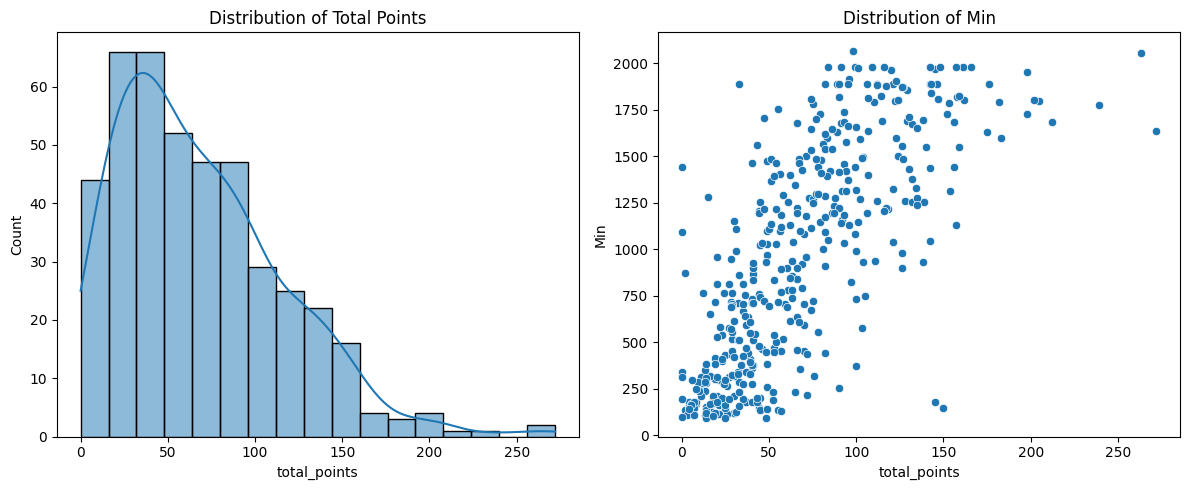

In [49]:
# Plotting the distribution and scatterplot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x="total_points", kde=True, fill=True, ax=axes[0])
sns.scatterplot(data=df, x="total_points", y="Min", ax=axes[1])

axes[0].set_title("Distribution of Total Points")
axes[1].set_title("Distribution of Min")

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig("../report/figures/eda/total_points_vs_min.png")

1. ***Analysis of Points Distribution:***
The histogram with KDE overlay reveals a right-skewed distribution of total points. This skewness indicates that while most players accumulate lower points, a smaller number achieve high scores, highlighting the rarity of top-performing players.

2. ***Exploring the 'Min' Correlation:***
A noticeable positive correlation is observed between 'total_points' and 'Min', suggesting players with more playtime generally score more. While intuitive, this highlights the significant predictive value of 'Min'. This correlation may need to be addressed during modelling.

### Correlation Analysis

In [50]:
correlation_matrix = df.select_dtypes(exclude="object").corr()
correlation_with_total_points = correlation_matrix["total_points"].sort_values(
    ascending=False
)

# Print statistics of correlation with total points
correlation_with_total_points.drop("total_points").describe()

count    95.000000
mean      0.017877
std       0.150299
min      -0.253705
25%      -0.064216
50%       0.004800
75%       0.135624
max       0.740909
Name: total_points, dtype: float64

- Correlation values range from -0.253605 (minimum) to 0.740909 (maximum), averaging at 0.017877 with a standard deviation of 0.150299.
- The near-zero mean indicates generally low correlations between various variables and 'total_points'.
- The standard deviation suggests that most correlations are centered around this low mean.
- A notable exception is the strong correlation of 'Min', peaking at 0.740909, which will be a considered in model training.

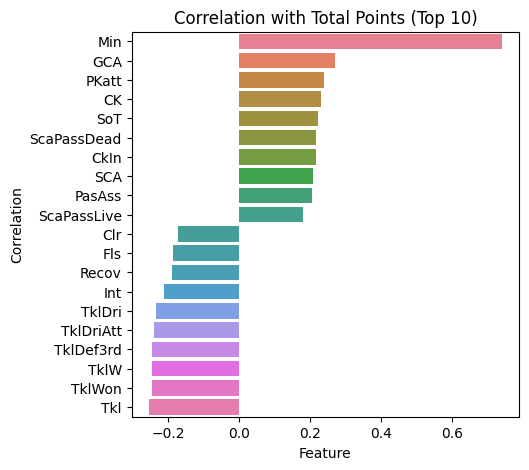

In [51]:
top_correlations = pd.concat(
    [correlation_with_total_points.head(11), correlation_with_total_points.tail(10)]
)
top_correlations = top_correlations.drop("total_points")

# Plot heatmap of correlation with total points
plt.figure(figsize=(5, 5))
sns.barplot(x=top_correlations, y=top_correlations.index, hue=top_correlations.index)
plt.title("Correlation with Total Points (Top 10)")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.savefig("../report/figures/eda/correlation_with_total_points.png")
plt.show()

After analyzing the correlations between various features and 'total_points', I observed that many features do not exhibit strong linear correlations. This finding suggests that the relationships in the data might be nonlinear, indicating the potential need for a nonlinear kernel, such as RBF or polynomial, in the SVM model to better capture these complex relationships and improve prediction. This can be seen in the barplot figure, which displays the top correlations, as there is a large dropoff in correlation after 'Min'.

### Position Analysis

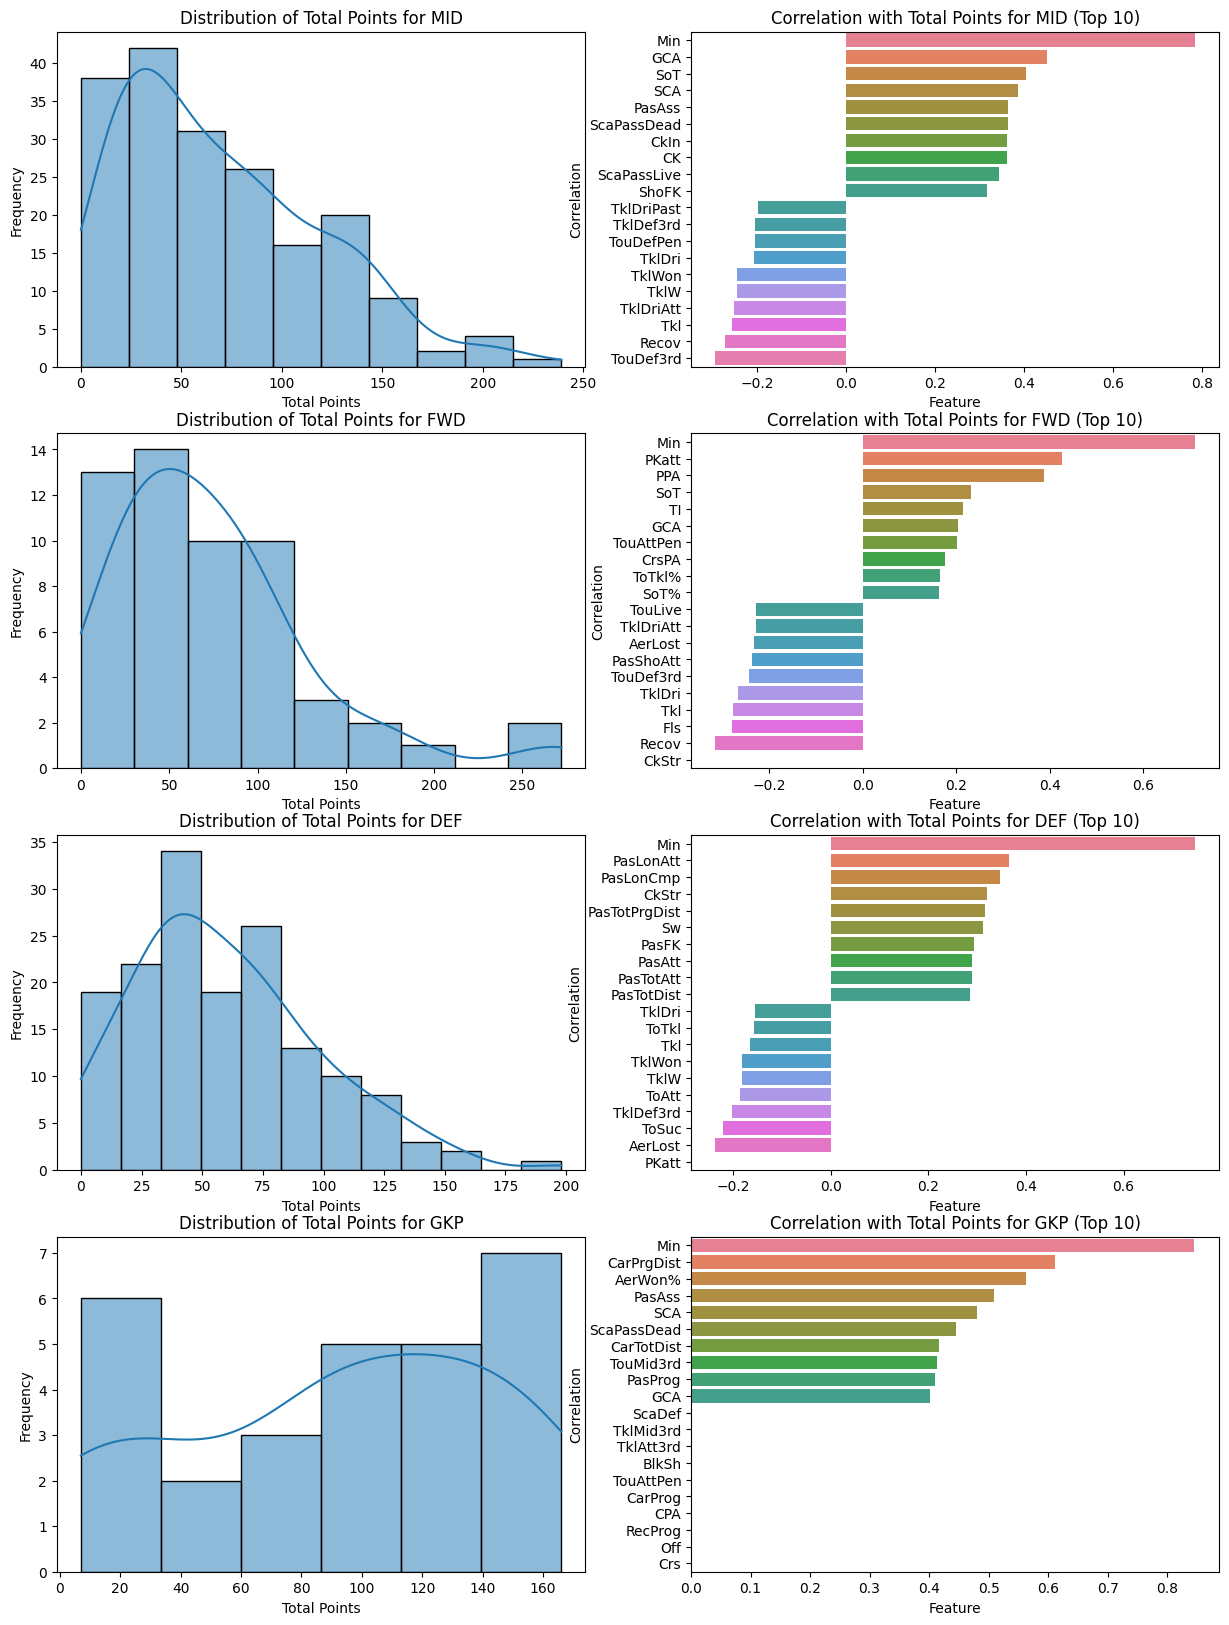

In [52]:
positions = df["position"].unique()

# Subplot for each position
fig, axes = plt.subplots(len(positions), 2, figsize=(15, 5 * len(positions)))

for i, position in enumerate(positions):
    position_df = df[df["position"] == position]

    sns.histplot(data=position_df, x="total_points", kde=True, fill=True, ax=axes[i][0])
    axes[i][0].set_title(f"Distribution of Total Points for {position}")
    axes[i][0].set_xlabel("Total Points")
    axes[i][0].set_ylabel("Frequency")

    # Plot correlation with total points
    correlation_matrix = position_df.select_dtypes(exclude="object").corr()
    correlation_with_total_points = correlation_matrix["total_points"].sort_values(
        ascending=False
    )
    correlation_with_total_points = correlation_with_total_points.drop("total_points")
    correlation_with_total_points = pd.concat(
        [correlation_with_total_points.head(10), correlation_with_total_points.tail(10)]
    )

    sns.barplot(
        x=correlation_with_total_points,
        y=correlation_with_total_points.index,
        hue=correlation_with_total_points.index,
        ax=axes[i][1],
    )
    axes[i][1].set_title(f"Correlation with Total Points for {position} (Top 10)")
    axes[i][1].set_xlabel("Feature")
    axes[i][1].set_ylabel("Correlation")
    
    plt.savefig("../report/figures/eda/correlation_with_total_points_by_position.png")

plt.show()

### Conclusion: Insights from the EDA on Fantasy Premier League Dataset

The exploratory data analysis of the Fantasy Premier League dataset has yielded several key insights:

1. ***Significance of 'Min' in Predicting Points:***
The analysis has highlighted 'Min' (minutes played) as a significant predictor for 'total_points'. A positive correlation between these two suggests that players with more playing time are more likely to score higher points, though outliers in this trend need careful consideration.

2. ***Varied Correlation Across Player Positions:***
A critical finding is the diversity in correlation patterns across different positions. Each position, whether it be Midfielder, Forward, Defender, or Goalkeeper, demonstrates unique variables that are strongly correlated with point scores. This indicates the need for position-specific strategies in both analysis and fantasy league planning.

3. ***Right-Skewed Points Distribution:***
The distribution of total points is right-skewed, indicating that while a majority of players score lower points, a select few achieve high scores. This skewness is consistent across most positions, except for goalkeepers, who show a different distribution pattern.

4. ***Unique Trend in Goalkeeper Distribution:***
The Goalkeeper (GKP) position exhibits a distinct distribution pattern from other positions. This variance necessitates a specialized approach in the modelling phase, acknowledging the unique role and scoring dynamics of goalkeepers in the game.

5. ***Sample Imbalance and Its Implications:***
The uneven distribution of player samples across positions presents a challenge for analysis. It is crucial to account for this imbalance to avoid skewed interpretations and to ensure a holistic understanding of the dataset.

6. ***Future Model Development:***
These insights will be instrumental in developing predictive models for the Fantasy Premier League. A different approach is need, considering the distinct characteristics of each position and the overall trends observed, will be essential for accurate and effective model performance.

In summary, this EDA has provided valuable insights into the dynamics of Fantasy Premier League scoring, highlighting the importance of minutes played, position-specific analysis, and the need to address data distribution imbalances.



### Future Work

#### Insights on Player Performance Metrics:

1. ***Confirmation of Initial Hypothesis:*** The hypothesis that there is a significant correlation between the minutes played ('Min') and the total points scored by players was validated through the EDA. This insight is critical as it directly influences the predictive modeling approach.

2. ***Switching the Target Metric to Points/Min:*** Given the strong correlation between 'Min' and total points, the focus will be shifted towards predicting points per minute (points/min) rather than total points. This change in the target metric aims to capture a more nuanced understanding of player efficiency, allowing for a more accurate assessment of player value, especially in cases where playing time may vary significantly.

#### Position-Specific Analysis:

1. ***Separate Analysis for Each Position:*** The EDA revealed distinct patterns in point distribution and correlations across different player positions (Midfielders, Forwards, Defenders, and especially Goalkeepers). This finding necessitates a tailored approach where each position is analyzed separately to capture unique characteristics and correlations relevant to each role.

2. ***Special Focus on Goalkeepers:*** Goalkeepers exhibited a significantly different pattern in both point distribution and correlation factors. Their unique role in fantasy leagues warrants a dedicated analytical approach, different from outfield players, to accurately predict their performance.

#### Dataset Size Considerations:

1. ***Implications of Separate Analysis on Dataset Size:*** Segmenting the analysis by player position implies working with smaller subsets of the already limited dataset. This could pose challenges in terms of statistical power and model generalization. Strategies such as cross-validation, bootstrapping, or even data augmentation might be necessary to mitigate the risks associated with reduced dataset size.